<a href="https://colab.research.google.com/github/Image-AI/HotProjectsTrials/blob/main/AnimePortraid/Copy_of_stylegan2_pytorch_Anime(half-completed).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive/")

Mounted at /content/gdrive/


In [ ]:
!pip install ivy-core
# test a high-level ml frame

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 228 kB 5.1 MB/s 
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19190 sha256=7f9c5c9699488f29cc83ae998f510b8f4c2293df1a83d0ddb30ed2d925af38fe
  Stored in directory: /root/.cache/pip/wheels/df/99/da/c34f202dc8fd1dffd35e0ecf1a7d7f8374ca05fbcbaf974b83
Successfully built nvidia-ml-py3


In [ ]:
!git clone https://github.com/Tetratrio/stylegan2_pytorch.git
%cd /content/stylegan2_pytorch


Cloning into 'stylegan2_pytorch'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (6/6), done.
remote: Compressing objects: 100% (6/6), done.
remote: Total 121 (delta 0), reused 1 (delta 0), pack-reused 115
Receiving objects: 100% (121/121), 97.19 KiB | 4.86 MiB/s, done.
Resolving deltas: 100% (66/66), done.
/content/stylegan2_pytorch


In [ ]:
!cp /content/gdrive/MyDrive/PretrainedModels/2020-01-11-skylion-stylegan2-animeportraits-networksnapshot-024664.pkl /content/stylegan2_pytorch/2020-01-11-skylion-stylegan2-animeportraits-networksnapshot-024664.pkl

In [ ]:
!python run_convert_from_tf.py --input=2020-01-11-skylion-stylegan2-animeportraits-networksnapshot-024664.pkl --output checkpoint

Converting tensorflow models and saving them...
Done!


In [ ]:
!python run_generator.py generate_images --network=checkpoint/Gs.pth --seeds=65,231,388,1520 --truncation_psi=1.0

                         

Generating images...
                                 

Done!
100% 4/4 [00:05<00:00,  1.33s/it]


# Convert from cntk to onnx.ipynb

In [ ]:
# !cp -r /content/gdrive/MyDrive/PretrainedModels/DeepDanbooru-v2-p4-eval/ /content/stylegan2_pytorch/checkpoint/


In [ ]:
# import cntk as C

# model_path = 'checkpoint/model.cntk'

# ctnk_model = C.load_model(model_path)
# ctnk_model.save('checkpoint/model.onnx', format=C.ModelFormat.ONNX)

!cp /content/gdrive/MyDrive/PretrainedModels/model.onnx /content/stylegan2_pytorch/checkpoint/model.onnx
!cp /content/gdrive/MyDrive/PretrainedModels/DeepDanbooru-v2-p4-eval/danbooru-resnet_custom_v2-p4/tags.txt /content/stylegan2_pytorch/checkpoint/tags.txt

In [ ]:
!apt-get install --no-install-recommends openmpi-bin libopenmpi-dev libopencv-dev python3-opencv python-opencv && ln -sf /usr/lib/x86_64-linux-gnu/libmpi_cxx.so /usr/lib/x86_64-linux-gnu/libmpi_cxx.so.1 && ln -sf /usr/lib/x86_64-linux-gnu/openmpi/lib/libmpi.so /usr/lib/x86_64-linux-gnu/openmpi/lib/libmpi.so.12 && ln -sf /usr/lib/x86_64-linux-gnu/libmpi.so /usr/lib/x86_64-linux-gnu/libmpi.so.12 && pip install cntk

Reading package lists... Done
Building dependency tree       
Reading state information... Done
libopenmpi-dev is already the newest version (2.1.1-8).
openmpi-bin is already the newest version (2.1.1-8).
openmpi-bin set to manually installed.
libopencv-dev is already the newest version (3.2.0+dfsg-4ubuntu0.1).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  python3-numpy
Suggested packages:
  python-numpy-doc python3-nose python3-numpy-dbg
The following NEW packages will be installed:
  python-opencv python3-numpy python3-opencv
0 upgraded, 3 newly installed, 0 to remove and 49 not upgraded.
Need to get 3,012 kB of archives.
After this operation, 16.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic-updates/universe amd64 python-opencv amd64 3.2.0+dfsg-4ubuntu0.1 [535 kB]
Get:2 http://archive.ubuntu.com/ubu

In [ ]:
!pip install -q onnxruntime

     |████████████████████████████████| 5.2 MB 5.1 MB/s 


In [ ]:
import onnxruntime
import numpy as np


ort_session = onnxruntime.InferenceSession("checkpoint/model.onnx")

x = np.random.rand(1, 3, 299, 299).astype(np.float32)
# compute ONNX Runtime output prediction
ort_inputs = {ort_session.get_inputs()[0].name: x}
ort_outs = ort_session.run(None, ort_inputs)

# compute the ctnk output


# Generate labeled anime data.ipynb

['1girl', 'bangs', 'blue_eyes', 'blush', 'eyebrows_visible_through_hair', 'long_hair', 'looking_at_viewer', 'one_eye_closed', 'open_mouth', 'solo', 'rating:safe']


  0%|          | 0/5000 [00:00<?, ?it/s]

Done!

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:66: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


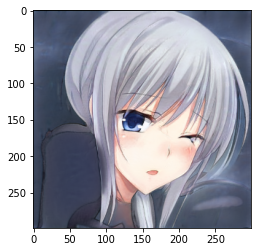

In [ ]:
import os
import onnxruntime
import torch
import numpy as np
import torch.nn.functional as F
import matplotlib.pyplot as plt
input_path = 'checkpoint'
tags_path = os.path.join(input_path, 'tags.txt')
model_path = os.path.join(input_path, 'model.onnx')
generator_path = os.path.join(input_path, 'Gs.pth')
device =  device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
batch_size = 4
seed = 0
# let's run one image to checkout if it works
C = onnxruntime.InferenceSession(model_path)
with open(tags_path, 'r') as tags_stream:
    tags = np.array([tag for tag in (tag.strip() for tag in tags_stream) if tag])
import stylegan2
from stylegan2 import utils

G = stylegan2.models.load(generator_path, map_location=device)
G.to(device)
def to_image_tensor(image_tensor, pixel_min=-1, pixel_max=1):
    if pixel_min != 0 or pixel_max != 1:
        image_tensor = (image_tensor - pixel_min) / (pixel_max - pixel_min)
    return image_tensor.clamp(min=0, max=1)
torch.manual_seed(seed)

qlatents = torch.randn(1, G.latent_size).to(device=device, dtype=torch.float32)
generated = G(qlatents)
images = to_image_tensor(generated)
# 299 is the input size of the model
images = F.interpolate(images, size=(299, 299), mode='bilinear')
ort_inputs = {C.get_inputs()[0].name: images.detach().cpu().numpy()}
[predicted_labels] = C.run(None, ort_inputs)
# print out some tags
plt.imshow(images[0].detach().cpu().permute(1, 2, 0))
labels = [tags[i] for i, score in enumerate(predicted_labels[0]) if score > 0.5]
print(labels)
# reset seed
torch.manual_seed(seed)
iteration = 5000

progress = utils.ProgressWriter(iteration)
progress.write('Generating images...', step=False)

qlatents_data = torch.Tensor(0, G.latent_size).to(device=device, dtype=torch.float32)
dlatents_data = torch.Tensor(0, 16, G.latent_size).to(device=device, dtype=torch.float32)
labels_data = torch.Tensor(0, len(tags)).to(device=device, dtype=torch.float32)
for i in range(iteration):
    qlatents = torch.randn(batch_size, G.latent_size).to(device=device, dtype=torch.float32)
    with torch.no_grad():
        generated, dlatents = G(latents=qlatents, return_dlatents=True)
        # inplace to save memory
        generated = to_image_tensor(generated)
        # 299 is the input size of the model
        # resize the image to 299 * 299
        images = F.interpolate(generated, size=(299, 299), mode='bilinear')
        labels = []
        ## tagger does not take input as batch, need to feed one by one
        for image in images:
            ort_inputs = {C.get_inputs()[0].name: image.reshape(1, 3, 299, 299).detach().cpu().numpy()}
            [[predicted_labels]] = C.run(None, ort_inputs)
            labels.append(predicted_labels)
        # store the result
        labels_tensor = torch.Tensor(labels).to(device=device, dtype=torch.float32)
        qlatents_data = torch.cat((qlatents_data, qlatents))
        dlatents_data = torch.cat((dlatents_data, dlatents))
        labels_data = torch.cat((labels_data, labels_tensor))

        progress.step()

progress.write('Done!', step=False)
progress.close()
torch.save({
    'qlatents_data': qlatents_data.cpu(),
    'dlatents_data': dlatents_data.cpu(),
    'labels_data': labels_data.cpu(),
    'tags': tags
}, 'latents.pth')




In [ ]:
!cp /content/stylegan2_pytorch/latents.pth /content/gdrive/MyDrive/PretrainedModels/latents.pth

In [ ]:
!cp /content/stylegan2_pytorch/latents.pth /content/stylegan2_pytorch/checkpoint/latents.pth

# Make Encoder

In [ ]:
import torch
import matplotlib.pylab as plt
import numpy as np
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import os

import stylegan2

In [ ]:
input_path = 'checkpoint'
latents_path = os.path.join(input_path, 'latents.pth')
generator_path = os.path.join(input_path, 'Gs.pth')
# device  = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device=torch.device("cpu")
batch_size = 4
seed = 0

In [ ]:
state = torch.load(latents_path, map_location=device)

qlatents_data = state['qlatents_data']
dlatents_data = state['dlatents_data']
labels_data = state['labels_data']
tags = state['tags']

G = stylegan2.models.load(generator_path)

In [ ]:
zipped = list(zip(dlatents_data, labels_data))

train_size = int(0.7 * len(zipped))
valid_size = int(len(zipped) * 0.2)
test_size = len(zipped) - train_size - valid_size

train_dataset, valid_dataset, test_dataset = torch.utils.data.random_split(zipped, [train_size, valid_size, test_size])

datasets = dict(
    train =  torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, shuffle=True, num_workers=4),
    valid = torch.utils.data.DataLoader(valid_dataset, batch_size=batch_size, shuffle=True, num_workers=4),
    test = test_dataset,
)

In [ ]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # kernel
        self.main = nn.Sequential(
          nn.Linear(in_features=16*512, out_features=1),
          nn.LeakyReLU(0.2),
          nn.Sigmoid(),
        )

    def forward(self, x):
        return self.main(x)

In [ ]:
def train_coeff(tag, total=5):
    model = Net()
    # create your optimizer
    optimizer = optim.SGD(model.parameters(), lr=0.01)
    criterion = nn.BCELoss()
    [tag_index], = np.where(tags == tag)
    
    # epoch = 0
    epoch = 3
    while True:
        # epoch += 1
        training_loss, valid_loss = 0.0, 0.0
        for phase in ['train', 'valid']:
            dataset = datasets[phase]
            if phase == 'train':
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            for (dlatents, labels) in dataset:
                # in your training loop:
                optimizer.zero_grad()   # zero the gradient buffers
                with torch.set_grad_enabled(phase == 'train'):
                    inputs = dlatents.reshape(-1, 16*512)
                    output = model(inputs)
                    targets = torch.Tensor(0, 1)
                    for label in labels:
                        value = label[tag_index]
                        #value = 1.0 if value > 0.5 else 0.0
                        new_label = torch.Tensor([[value]])
                        targets = torch.cat((targets, new_label))

                    loss = criterion(output, targets)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()    # Does the update
                # statistics
                running_loss += loss.item() * inputs.size(0)

            epoch_loss = running_loss / (len(dataset) * batch_size)
            print(f'Epoch:{epoch}/{total}, {phase} Loss: {epoch_loss:.4f}')
            
        if epoch == total:
            break
        
    weight = model.state_dict()['main.0.weight']
    return torch.Tensor(weight).reshape(16, 512)

In [ ]:
result = {}
# result['black_hair'] = train_coeff('black_hair', 3)
result['red_eyes'] = train_coeff('red_eyes', 3)

Epoch:3/3, train Loss: 0.5235
Epoch:3/3, valid Loss: 0.4616


In [ ]:
def generate_image(dlatents, pixel_min=-1, pixel_max=1):
    generated = G(dlatents=dlatents)
    if pixel_min != 0 or pixel_max != 1:
        generated = (generated - pixel_min) / (pixel_max - pixel_min)
    generated.clamp_(min=0, max=1)
    return generated.detach().reshape(3, 512, 512).permute(1, 2, 0)

In [ ]:
def move_and_show(latent_vector, direction, coeffs):
    fig,ax = plt.subplots(1, len(coeffs), figsize=(25, 25), dpi=80)
    for i, coeff in enumerate(coeffs):
        new_latent_vector = latent_vector.clone()
        new_latent_vector[:8] = (latent_vector + coeff*direction)[:8]
        ax[i].imshow(generate_image(new_latent_vector))
        ax[i].set_title('Coeff: %0.1f' % coeff)
    [x.axis('off') for x in ax]
    plt.show()

In [ ]:
def move_and_show_samples(direction, sample=3, coeffs=[-5, -1.5, 0, 1.5, 5]):
    for (latents, labels) in list(datasets['test'])[:sample]:
        inputs = latents.clone().reshape(1, 16, 512)
        move_and_show(inputs, direction, coeffs)

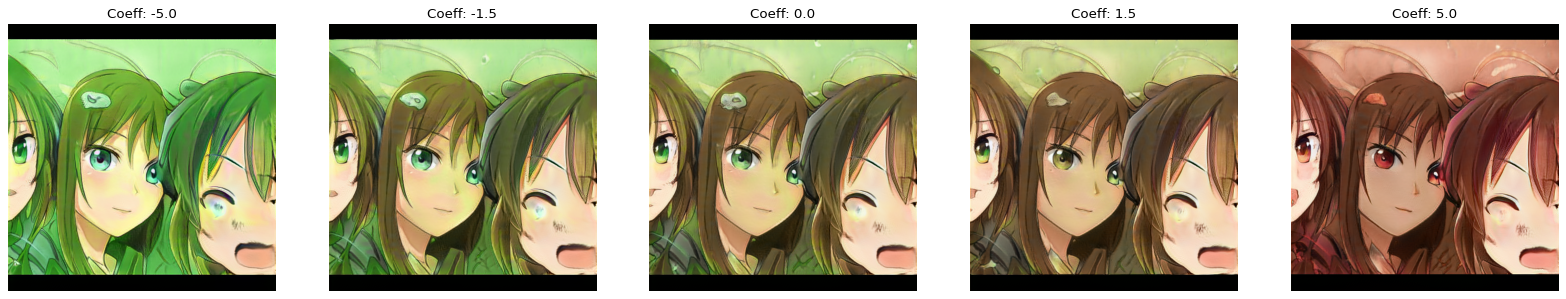

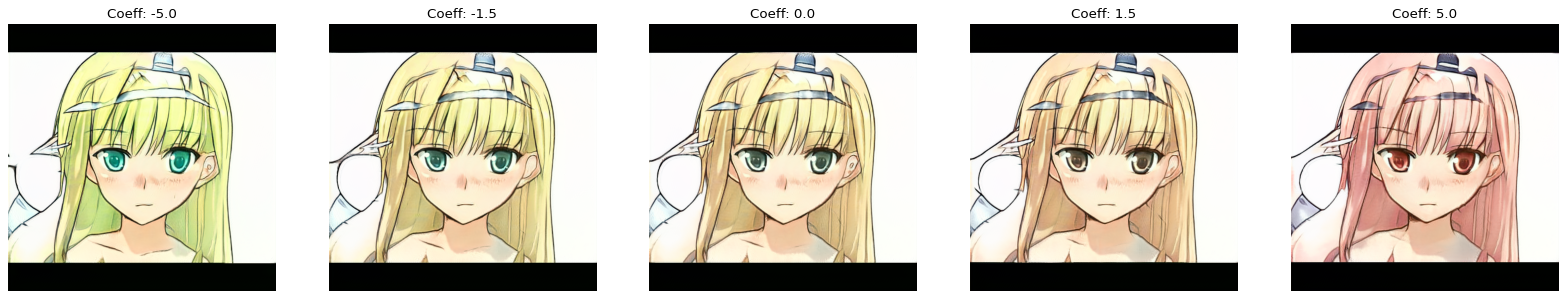

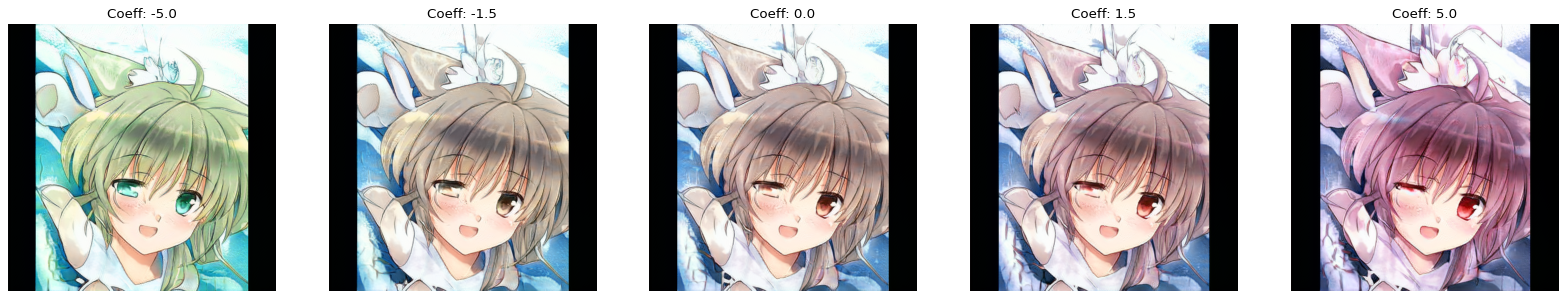

In [ ]:
## Let's show some sample of the result
move_and_show_samples(result['red_eyes'])

In [ ]:
## Let's pick some tags and train it!

colors = ['aqua', 'black', 'blue', 'brown',  'green', 'grey', 'lavender', 'light_brown', 'multicolored', 'orange', 'pink', 'purple', 'red', 'silver', 'white', 'yellow']
switches = ['open', 'closed', 'covered']

# generate composition of elements
components = ['eyes', 'hair', 'mouth']

picked_tags = []
for component in components:
    picked_tags = picked_tags + [f'{color}_{component}' for color in colors]
    picked_tags = picked_tags + [f'{switch}_{component}' for switch in switches]
    
# filter out the real tags
picked_tags = [tag for tag in picked_tags if tag in tags]
print(picked_tags)

['aqua_eyes', 'black_eyes', 'blue_eyes', 'brown_eyes', 'green_eyes', 'grey_eyes', 'lavender_eyes', 'light_brown_eyes', 'multicolored_eyes', 'orange_eyes', 'pink_eyes', 'purple_eyes', 'red_eyes', 'silver_eyes', 'white_eyes', 'yellow_eyes', 'open_eyes', 'closed_eyes', 'covered_eyes', 'aqua_hair', 'black_hair', 'blue_hair', 'brown_hair', 'green_hair', 'grey_hair', 'lavender_hair', 'light_brown_hair', 'multicolored_hair', 'orange_hair', 'pink_hair', 'purple_hair', 'red_hair', 'silver_hair', 'white_hair', 'open_mouth', 'closed_mouth', 'covered_mouth']


In [ ]:
## Train all these tags!
for tag in picked_tags:
    print(f'training {tag}')
    result[tag] = train_coeff(tag, 3)

training aqua_eyes
Epoch:3/3, train Loss: 0.1004
Epoch:3/3, valid Loss: 0.0948
training black_eyes
Epoch:3/3, train Loss: 0.0636
Epoch:3/3, valid Loss: 0.0642
training blue_eyes
Epoch:3/3, train Loss: 0.4462
Epoch:3/3, valid Loss: 0.4111
training brown_eyes
Epoch:3/3, train Loss: 0.3198
Epoch:3/3, valid Loss: 0.3268
training green_eyes
Epoch:3/3, train Loss: 0.3053
Epoch:3/3, valid Loss: 0.2822
training grey_eyes
Epoch:3/3, train Loss: 0.0439
Epoch:3/3, valid Loss: 0.0430
training lavender_eyes
Epoch:3/3, train Loss: 0.0083
Epoch:3/3, valid Loss: 0.0070
training light_brown_eyes
Epoch:3/3, train Loss: 0.0046
Epoch:3/3, valid Loss: 0.0033
training multicolored_eyes
Epoch:3/3, train Loss: 0.0960
Epoch:3/3, valid Loss: 0.0912
training orange_eyes
Epoch:3/3, train Loss: 0.0962
Epoch:3/3, valid Loss: 0.0920
training pink_eyes
Epoch:3/3, train Loss: 0.1730
Epoch:3/3, valid Loss: 0.1538
training purple_eyes
Epoch:3/3, train Loss: 0.3360
Epoch:3/3, valid Loss: 0.3275
training red_eyes
Epoch:3/

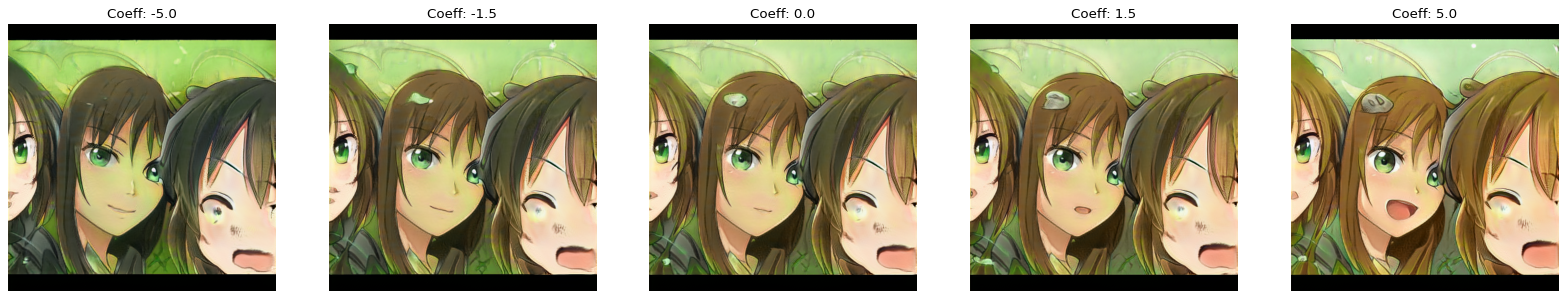

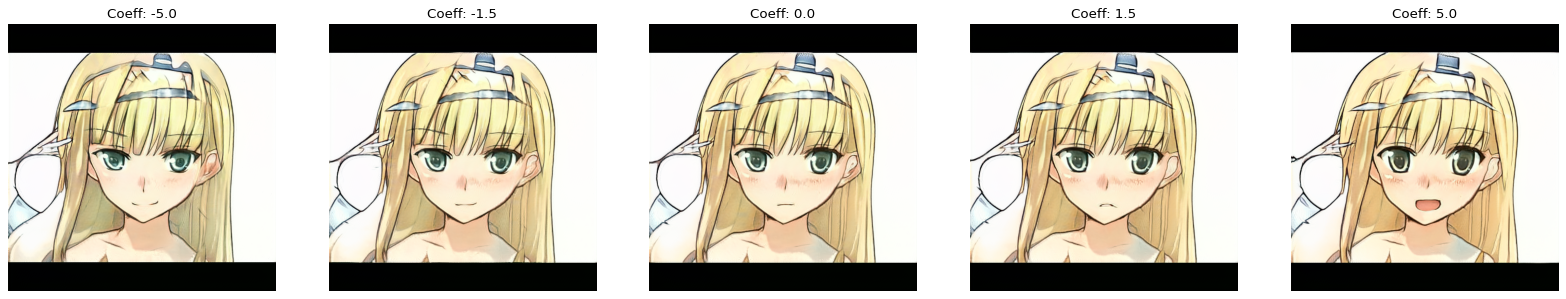

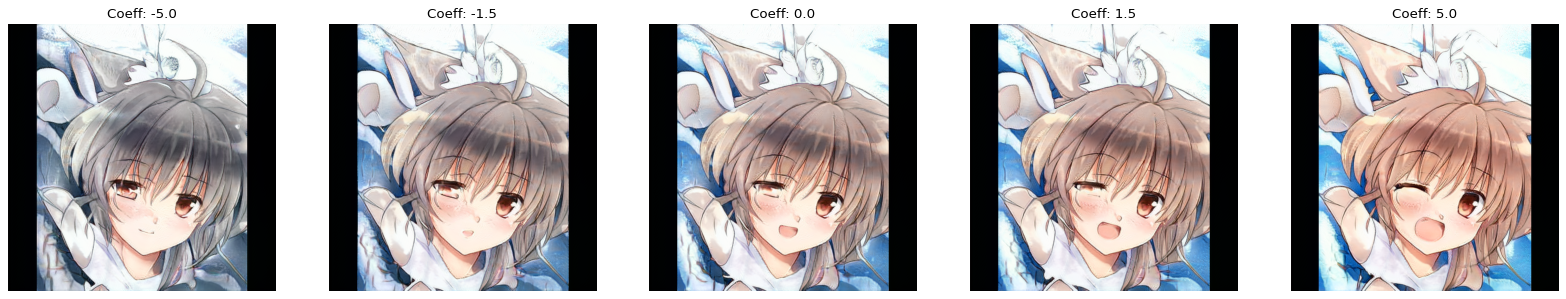

In [ ]:
# try some of them
move_and_show_samples(result['open_mouth'])

In [ ]:
# play a bit more, training charater specify encoder?

charas = ['hakurei_reimu', 'kirisame_marisa']

In [ ]:
# Let's check out how many samples we got
for chara in charas:
    [chara_index], = np.where(tags == chara)
    count = [x[chara_index] for x in labels_data if x[chara_index] > 0.5]
    print(f'{chara}: {len(count)}, {(len(count) / len(labels_data)) *100}%')
    result[chara] = train_coeff(chara, 3)

hakurei_reimu: 63, 0.315%
Epoch:3/3, train Loss: 0.0408
Epoch:3/3, valid Loss: 0.0448
kirisame_marisa: 194, 0.97%
Epoch:3/3, train Loss: 0.0696
Epoch:3/3, valid Loss: 0.0600


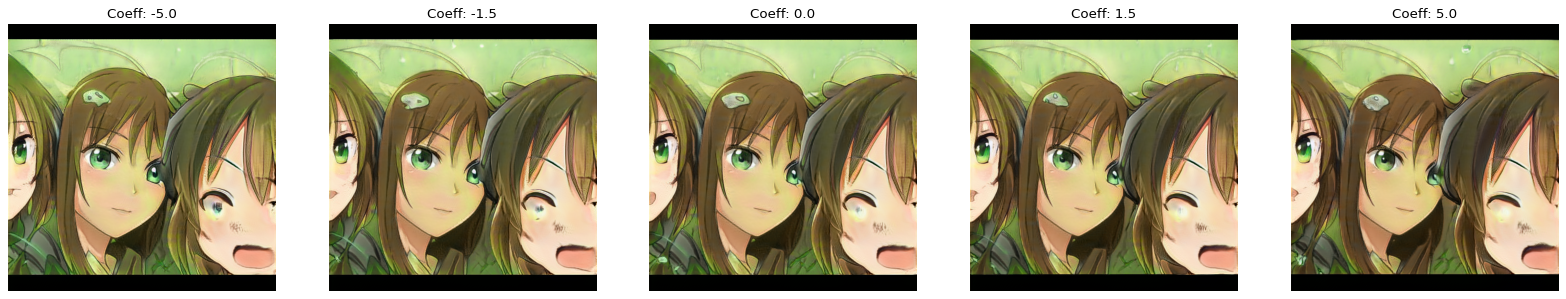

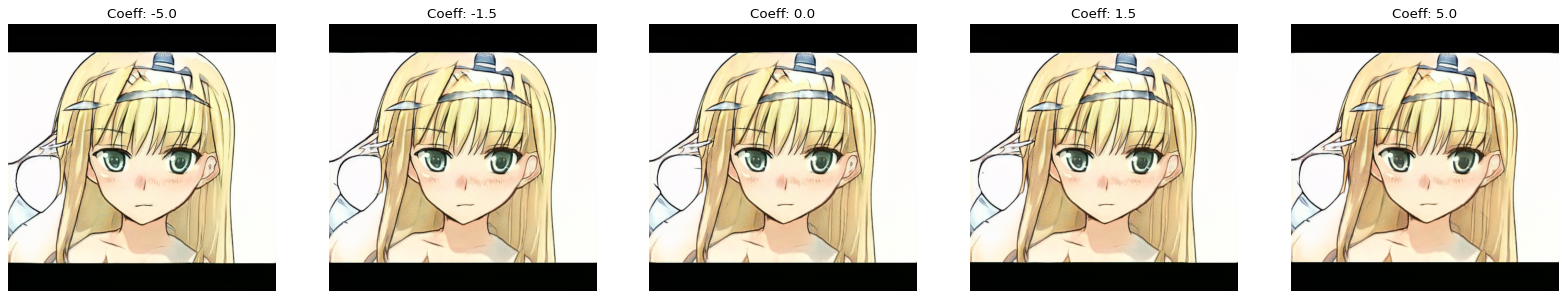

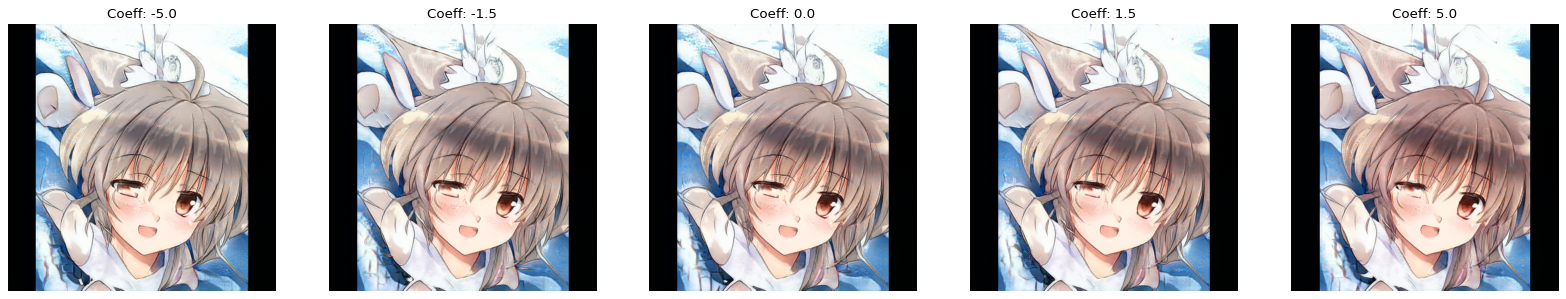

In [ ]:
# too rare, properly don't work
move_and_show_samples(result['hakurei_reimu'])

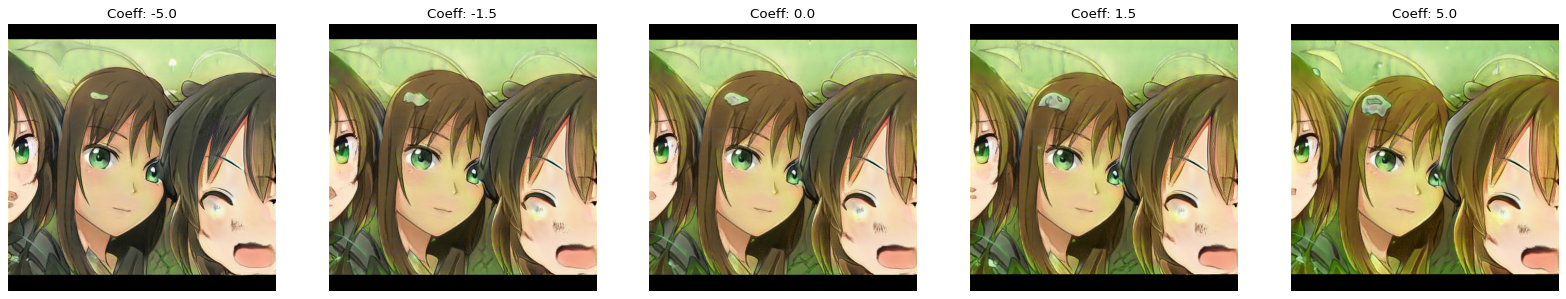

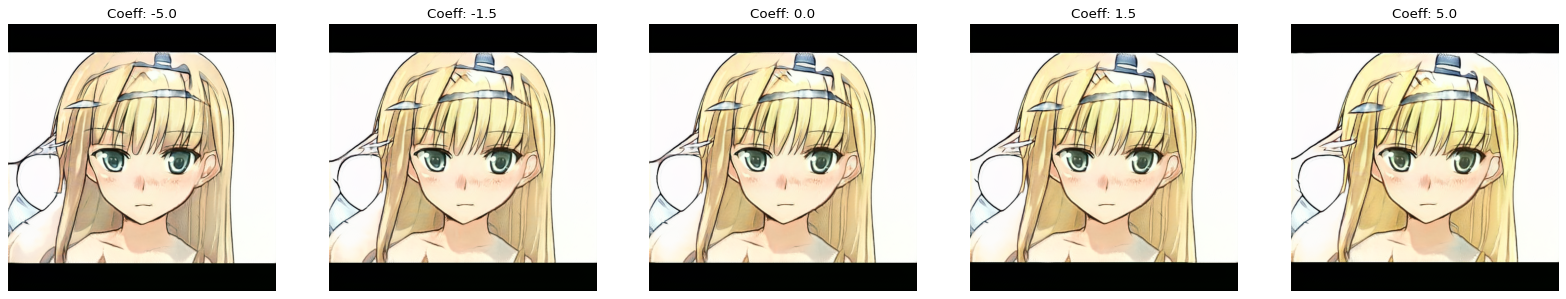

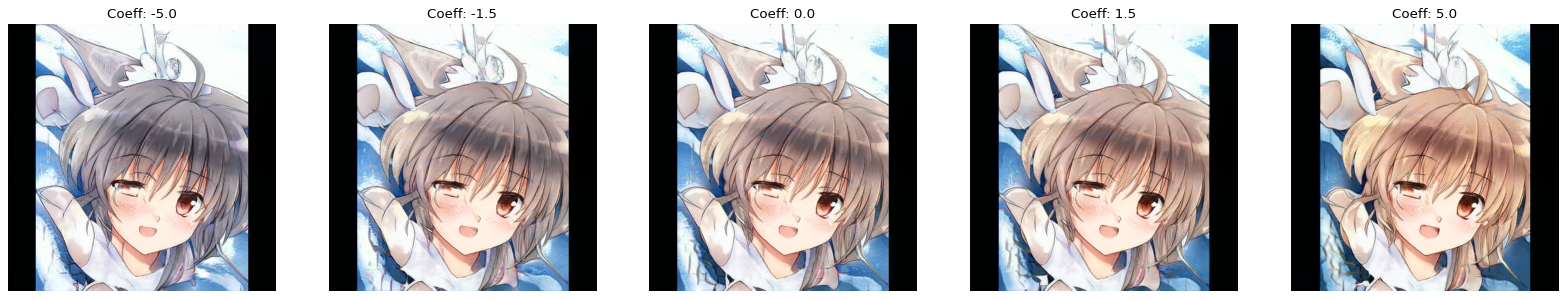

In [ ]:
move_and_show_samples(result['kirisame_marisa'])

In [ ]:
# store the result
torch.save(result, 'checkpoint/directions.pth')